### Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Download MNIST dataset

In [2]:
# ############### IF INTERNET IS NOT WORKING YOU MAY USE SKLEARN MNIST #############
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
# mnist = fetch_openml('mnist_784')
# X = mnist.data
# Y = mnist.target 
# xtrain, ytrain, xtest, ytest = train_test_split(X,Y, test_size=10000, 
#                                                 random_state=0)
# print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
# #######################################

In [3]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [4]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


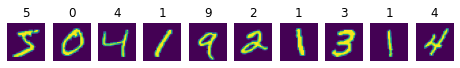

In [5]:
fig, axes = plt.subplots(1, 10, figsize=(8,3))

for img, label, ax in zip(xtrain[:10], ytrain[:10], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

### Prepare data

In [6]:
len(xtrain)

60000

In [7]:
x_train = xtrain.reshape(len(xtrain), 784)
x_test = xtest.reshape(10000, -1)

In [8]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [9]:
print(x_train.max(), x_train.min())

255 0


In [10]:
xtrain = x_train/255
xtest = x_test/255

In [11]:
print(xtrain.max(), xtest.min())

1.0 0.0


(0 0 1 0 0 0 0 0 0 0)= 2
- One hot encoding on labels

In [12]:
len(np.unique(ytrain) ) #No of classes 

10

In [13]:
print(ytrain[:3])

[5 0 4]


In [14]:
with tf.Session() as sess:
    y_train = sess.run(tf.one_hot(ytrain, 10))
    y_test = sess.run(tf.one_hot(ytest, 10))

In [15]:
print(y_train[:3][0].argmax()) # decoding
print(y_train[:3])

5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Define Hyperparameters

In [16]:
xtrain.shape[0]

60000

In [17]:
print(10/3)
print(10//3)
# for i in range(10.5):
#     print(i)

3.3333333333333335
3


In [18]:
learning_rate = 0.01
epochs = 40
batch_size = 100
no_of_batches = xtrain.shape[0]//batch_size
print(no_of_batches)

600


#### Define Input, Weights and biases

In [19]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

np.random.seed(10)

W = tf.Variable(0.1*np.random.randn(784,10).astype(np.float32))
B = tf.Variable(0.1*np.random.randn(10).astype(np.float32))
# s  = tf.Session()
# init = tf.global_variables_initializer()
# s.run(init)
# print(s.run(W))

### Implement prediction, cost and optimizer

<img src="CE.png">

In [20]:
pred = tf.nn.softmax(tf.add(tf.matmul(X,W),B))
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Load Saver

In [21]:
saver = tf.train.Saver()

### Let's run the graph...

In [22]:

# 0*100 = 0:100
# 1*100 = 100:200
# 2*100 = 200:300
correct_prediction = tf.equal(tf.arg_max(pred,1),tf.arg_max(Y,1)) #[True,False]
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

arr = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        j = 1
        for batch in range(int(no_of_batches)):
            offset = batch*batch_size
            x = xtrain[offset:batch_size*j]
            y = y_train[offset:batch_size*j]
#             print(offset,":",offset+batch_size)
            _, c,a = sess.run([optimizer, cost, accuracy], feed_dict={X:x, Y:y})
            
            j+=1
        arr.append([epoch, c, a])
        print("Epoch: {} Cost:{} Accuracy:{}".format(epoch, c, a) )
    print("Training Finished!\n")
    
    tr_acc = sess.run(accuracy, {X:xtrain, Y:y_train})
    ts_acc = sess.run(accuracy, {X:xtest, Y:y_test})
    print("Training accuracy:{}%".format(tr_acc*100))
    print("Testing accuracy:{}%".format(ts_acc*100))
    
    prediction = sess.run(pred, feed_dict={X:xtest})
    
    # Save trained model
    saver.save(sess, './models/save_model',write_meta_graph=False)
    

Instructions for updating:
Use `tf.math.argmax` instead
Epoch: 0 Cost:0.9740810990333557 Accuracy:0.7400000095367432
Epoch: 1 Cost:0.7215818762779236 Accuracy:0.800000011920929
Epoch: 2 Cost:0.613991916179657 Accuracy:0.8500000238418579
Epoch: 3 Cost:0.552263617515564 Accuracy:0.8999999761581421
Epoch: 4 Cost:0.511694073677063 Accuracy:0.8999999761581421
Epoch: 5 Cost:0.48283126950263977 Accuracy:0.8999999761581421
Epoch: 6 Cost:0.4611837863922119 Accuracy:0.8999999761581421
Epoch: 7 Cost:0.4443146884441376 Accuracy:0.9100000262260437
Epoch: 8 Cost:0.43077805638313293 Accuracy:0.9100000262260437
Epoch: 9 Cost:0.41965892910957336 Accuracy:0.9200000166893005
Epoch: 10 Cost:0.4103488028049469 Accuracy:0.9200000166893005
Epoch: 11 Cost:0.40242740511894226 Accuracy:0.9200000166893005
Epoch: 12 Cost:0.39559483528137207 Accuracy:0.9200000166893005
Epoch: 13 Cost:0.389631450176239 Accuracy:0.9200000166893005
Epoch: 14 Cost:0.3843732178211212 Accuracy:0.9200000166893005
Epoch: 15 Cost:0.3796943

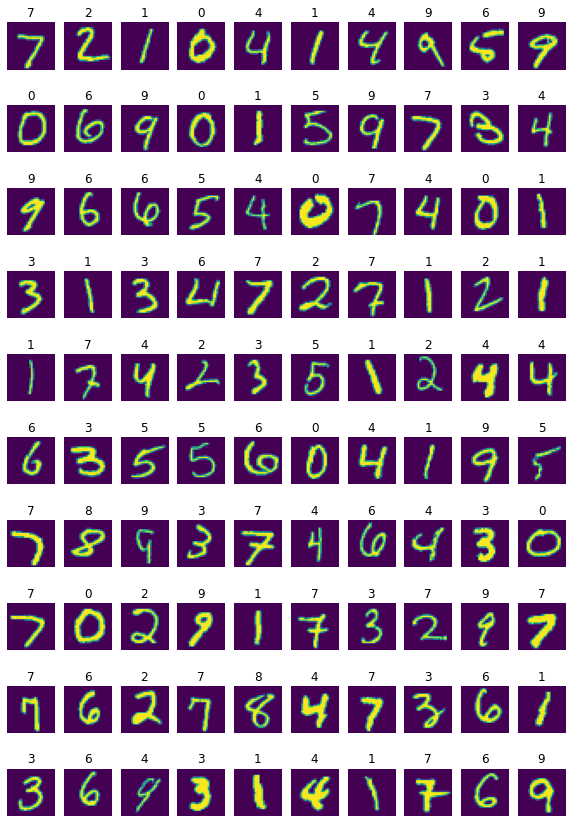

In [26]:
index=0
c=1
plt.figure(figsize=(10,15))
for img in xtest[:100]:
    plt.subplot(10,10,c)
    plt.imshow(img.reshape(28,28))
    plt.title(prediction[index].argmax())
    plt.axis('off')
    index+=1
    c+=1
plt.show()

In [24]:
import pandas as pd
df = pd.DataFrame(arr, columns=["Epoch","Cost","Accuracy"])
df.set_index("Epoch", inplace=True)
df.head()

Cost  Accuracy
Epoch                    
0      0.974081      0.74
1      0.721582      0.80
2      0.613992      0.85
3      0.552264      0.90
4      0.511694      0.90

<AxesSubplot:xlabel='Epoch'>

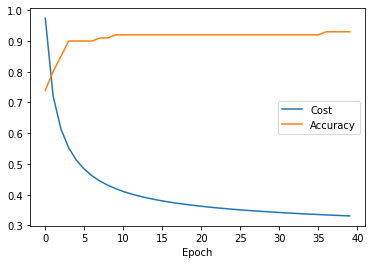

In [25]:
df.plot()

### Reload Model

(1, 784)
INFO:tensorflow:Restoring parameters from ./models/save_model


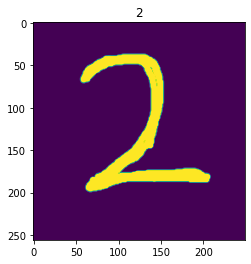

In [31]:
import cv2
img = cv2.imread("test1.png",0)
img1 = cv2.resize(img, (28,28)).reshape(1,-1)
print(img1.shape)
plt.imshow(img)

with tf.Session() as sess:
    saver.restore(sess, "./models/save_model")
    res = sess.run(pred, {X:img1})
    plt.title(res.argmax())

### Let's try with more images...

INFO:tensorflow:Restoring parameters from ./models/save_model


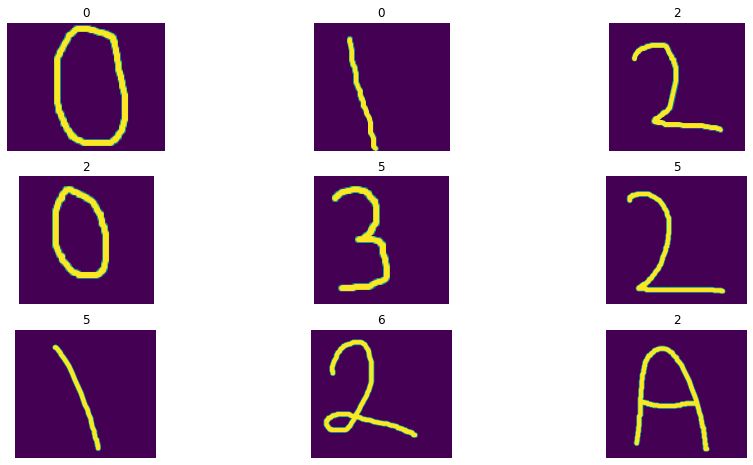

In [36]:
import os
path  = '../data/test_data/'
data = os.listdir(path)

sess = tf.Session()
saver.restore(sess, "./models/save_model")

plt.figure(figsize=(15,8))
i=1
for img_name in data:
    plt.subplot(3,3,i)
    img = cv2.imread(path+img_name,0)
    img1 = cv2.resize(img, (28,28)).reshape(1,-1)
    result=sess.run(pred, {X:img1})
    plt.imshow(img)
    plt.axis("off")
    plt.title(result.argmax())
    i+=1